# Ridgeline Plot
<img
  src="ridgelinePlot_example.png"
  alt="Alt text" 
  title="Optional title" 
  style="display: inline-block; margin: auto; max-width: 600px">
  
>*source [Python Graph Gallery](https://www.python-graph-gallery.com/ridgeline-graph-seaborn)

<p>A ridgeline plot, also called a joyplot, shows the distribution of numerical values across multiple categorical groups. (discrete date values, geographic locations, demographic groups, discrete ages, etc.). Essentially it is just a vertically stacked, compressed vertical collection of slightly overlapped area charts. Distributions can be represented for each group using a density plot or histogram, but each group is aligned across the same horizontal scale and presented with slight overlap.</p>

<br>

<p>This kind of plot is especially useful when there is a need to visualize the distrubutions of a medium to high number of categorical groups in a limited amount of space. This kind of plot works well when there is a clear pattern to discover since it hides a part of the data when overlap takes place.</p>

## Python Approach 1:  `joyplot`  library\
Following Dario Radečić's [blog post](https://towardsdatascience.com/ridgeline-plots-the-perfect-way-to-visualize-data-distributions-with-python-de99a5493052). Also using the [joyplot documentation](https://deepnote.com/@deepnote/Joyplot-Introduction-4666e1a3-3249-442e-9a94-2bbcc5cb1b1d)

In [1]:
# # installing joypy library
# !pip install joypy

In [2]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from joypy import joyplot

### Reading data from excel file
Following [this](https://pythonbasics.org/read-excel/#:~:text=To%20read%20an%20excel%20file,is%20a%20tabular%20like%20structure.) how to from Python Basics

In [3]:
# # installing read excel library
# !pip install xlrd

In [14]:
# reading excel file data to df
filePath = 'ridgelinePlot.xlsx'

df = pd.read_excel(filePath, sheet_name = 'pivotProfitByState').iloc[:49]

# column cleanup
df.columns = df.columns.str.lower().str.replace(' ', '_')
df


,row_labels,sum_of_sales,sum_of_cost,sum_of_profit
0,Alabama,19510.6400,13723.8147,5786.8253
1,Arizona,35282.0010,38709.9256,-3427.9246
2,Arkansas,11678.1300,7669.4429,4008.6871
3,California,457687.6315,381306.2444,76381.3871
4,Colorado,32108.1180,38635.9759,-6527.8579
5,Connecticut,13384.3570,9872.8652,3511.4918
6,Delaware,27451.0690,17473.6942,9977.3748
7,District of Columbia,2865.0200,1805.4307,1059.5893
8,Florida,89473.7080,92873.0097,-3399.3017
9,Georgia,49095.8400,32845.7967,16250.0433


### Quick Cleanup

In [15]:
# quick data import quality check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_labels     49 non-null     object 
 1   sum_of_sales   49 non-null     float64
 2   sum_of_cost    49 non-null     float64
 3   sum_of_profit  49 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.7+ KB


In [17]:
# a little more column cleanup
df.rename(columns = {'row_labels': 'states'}, inplace = True)
df.head(2)

,states,sum_of_sales,sum_of_cost,sum_of_profit
0,Alabama,19510.640,13723.8147,5786.8253
1,Arizona,35282.001,38709.9256,-3427.9246


In [18]:
df.rename(columns = {'states': 'state'}, inplace = True)

In [21]:
df.columns[1][:3]

'sum'

In [25]:
df.columns[1][7:]

'sales'

In [27]:
abbrev_names = []

for col in df.columns:
    if col[:3] =='sum':
        abbrev_names.append(col[7:])
    else:
        abbrev_names.append(col)
        
abbrev_names

['state', 'sales', 'cost', 'profit']

In [28]:
df.columns = abbrev_names

df.head()

,state,sales,cost,profit
0,Alabama,19510.6400,13723.8147,5786.8253
1,Arizona,35282.0010,38709.9256,-3427.9246
2,Arkansas,11678.1300,7669.4429,4008.6871
3,California,457687.6315,381306.2444,76381.3871
4,Colorado,32108.1180,38635.9759,-6527.8579


### Plotting single variable ridgeplot

<Figure size 432x288 with 0 Axes>

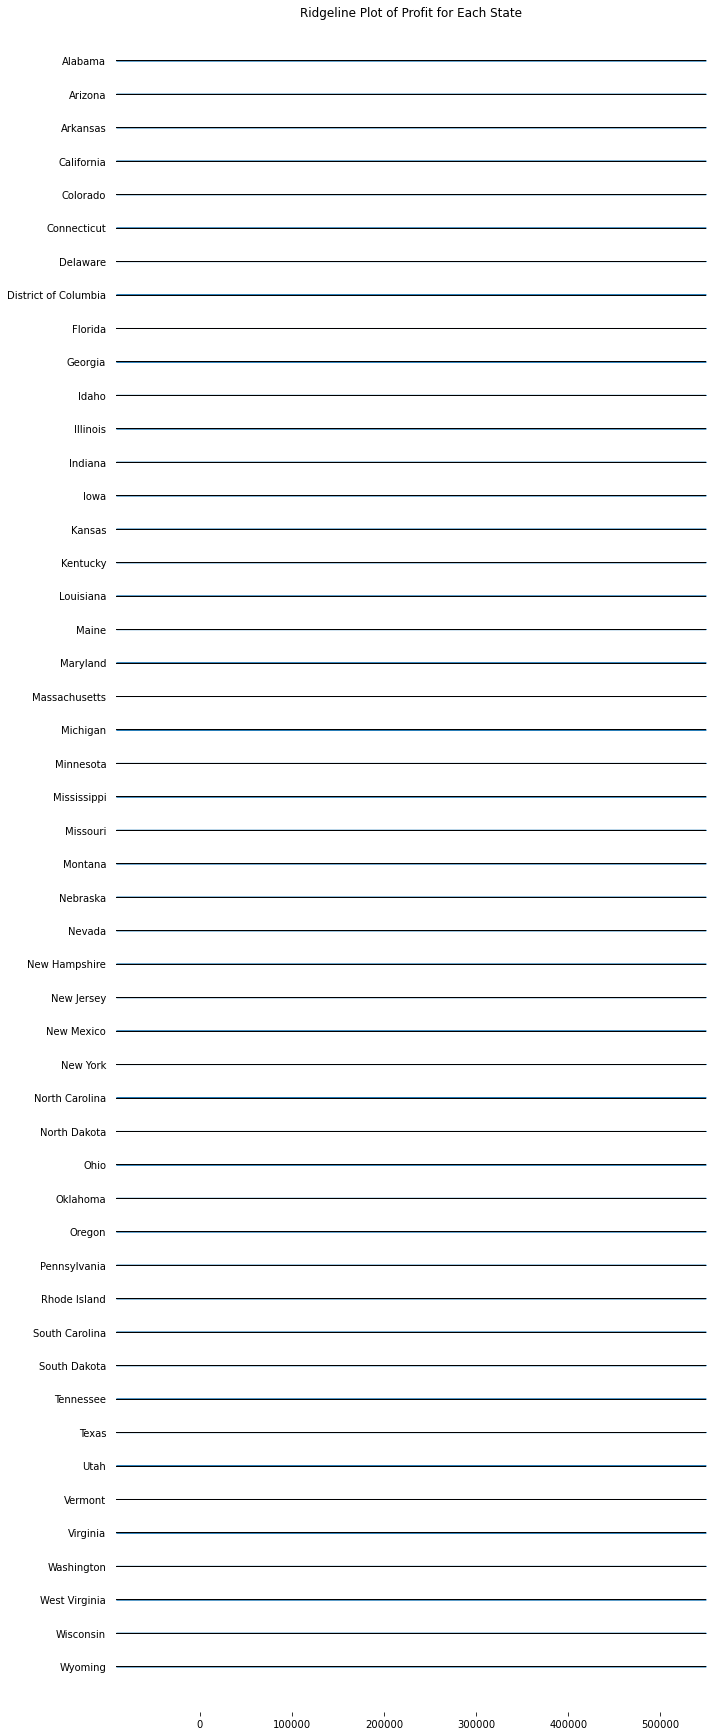

In [48]:
# plotting distribution of profit for each state
%matplotlib inline
plt.figure()

joyplot(
    data = df[['state', 'sales']],
    by = 'state',
#     column = 'profit',
    bins = 20,
#     hist = True,
    figsize = (10, 24),
    linewidth = 1
)

plt.title('Ridgeline Plot of Profit for Each State')

plt.show()

In [49]:
df.query('state == "Virginia"')

,state,sales,cost,profit
44,Virginia,70636.72,52038.7696,18597.9504


## This isn't giving me a ridgeplot
Realizing that the plot is what is pivots the data. Using the pivoted (aggregated by month) data, I just get a contanst (horizonal line) instead of a density plot or histogram. Going to use the other sheet, prior to data pivot.

In [54]:
df2 = pd.read_excel(filePath, sheet_name = 'ridgelineData')
df2

,Order Date - Full,Order Date - mm/yyyy,State,Sub-Category,Sales,Cost,Profit
0,2021-11-08,2021-11-08,Kentucky,Bookcases,261.9600,220.0464,41.9136
1,2021-11-08,2021-11-08,Kentucky,Chairs,731.9400,512.3580,219.5820
2,2021-06-12,2021-06-12,California,Labels,14.6200,7.7486,6.8714
3,2020-10-11,2020-10-11,Florida,Tables,957.5775,1340.6085,-383.0310
4,2020-10-11,2020-10-11,Florida,Storage,22.3680,19.8516,2.5164
...,...,...,...,...,...,...,...
9989,2019-01-21,2019-01-21,Florida,Furnishings,25.2480,21.1452,4.1028
9990,2022-02-26,2022-02-26,California,Furnishings,91.9600,76.3268,15.6332
9991,2022-02-26,2022-02-26,California,Phones,258.5760,239.1828,19.3932
9992,2022-02-26,2022-02-26,California,Paper,29.6000,16.2800,13.3200


In [64]:
# column cleanup
df2.columns.str.lower().str.replace(' ', '_')\
    .str.replace('_-', '')\
    .srr.replace()

Index(['order_date_full', 'order_date_mm/yyyy', 'state', 'sub-category',
       'sales', 'cost', 'profit'],
      dtype='object')

In [65]:
df2.columns

Index(['Order Date - Full', 'Order Date - mm/yyyy', 'State', 'Sub-Category',
       'Sales', 'Cost', 'Profit'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

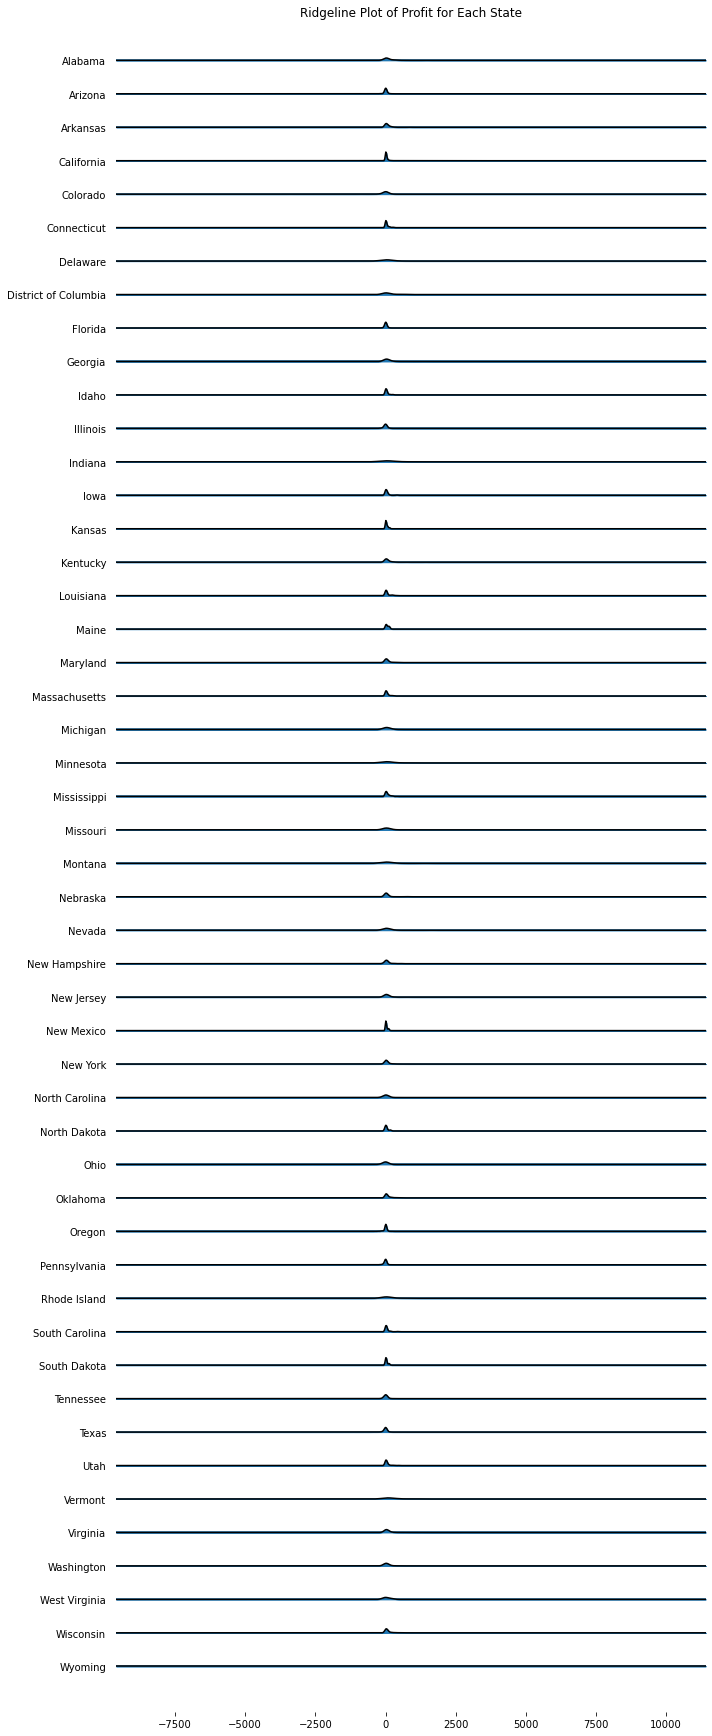

In [66]:
# plotting distribution of profit for each state
%matplotlib inline
plt.figure()

joyplot(
    #     hist = True,
    data = df2[['State', 'Profit']],
    by = 'State',
#     bins = 20,
    figsize = (10, 24),
)

plt.title('Ridgeline Plot of Profit for Each State')

plt.show()

<Figure size 432x288 with 0 Axes>

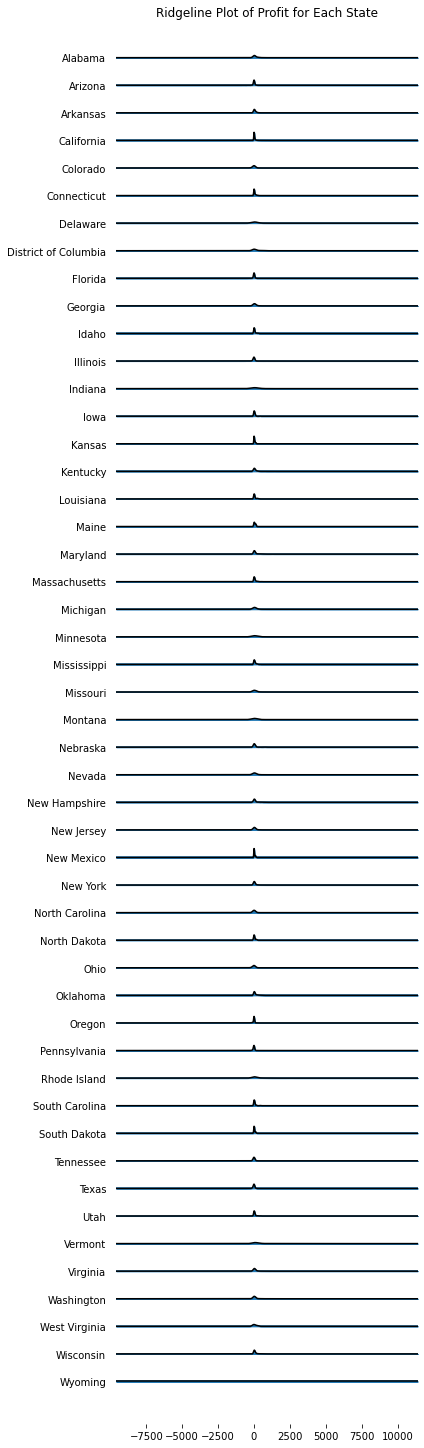

In [74]:
# looking a little better, going to try binning

# plotting distribution of profit for each state
%matplotlib inline
plt.figure()

joyplot(
#     hist = True,
    data = df2[['State', 'Profit']],
    by = 'State',
#     bins = 5,
    figsize = (6, 20)
)

plt.title('Ridgeline Plot of Profit for Each State')

plt.show()

In [75]:
df2.query("(Profit > -2500) & (Profit < 2500)")

,Order Date - Full,Order Date - mm/yyyy,State,Sub-Category,Sales,Cost,Profit
0,2021-11-08,2021-11-08,Kentucky,Bookcases,261.9600,220.0464,41.9136
1,2021-11-08,2021-11-08,Kentucky,Chairs,731.9400,512.3580,219.5820
2,2021-06-12,2021-06-12,California,Labels,14.6200,7.7486,6.8714
3,2020-10-11,2020-10-11,Florida,Tables,957.5775,1340.6085,-383.0310
4,2020-10-11,2020-10-11,Florida,Storage,22.3680,19.8516,2.5164
...,...,...,...,...,...,...,...
9989,2019-01-21,2019-01-21,Florida,Furnishings,25.2480,21.1452,4.1028
9990,2022-02-26,2022-02-26,California,Furnishings,91.9600,76.3268,15.6332
9991,2022-02-26,2022-02-26,California,Phones,258.5760,239.1828,19.3932
9992,2022-02-26,2022-02-26,California,Paper,29.6000,16.2800,13.3200


<Figure size 432x288 with 0 Axes>

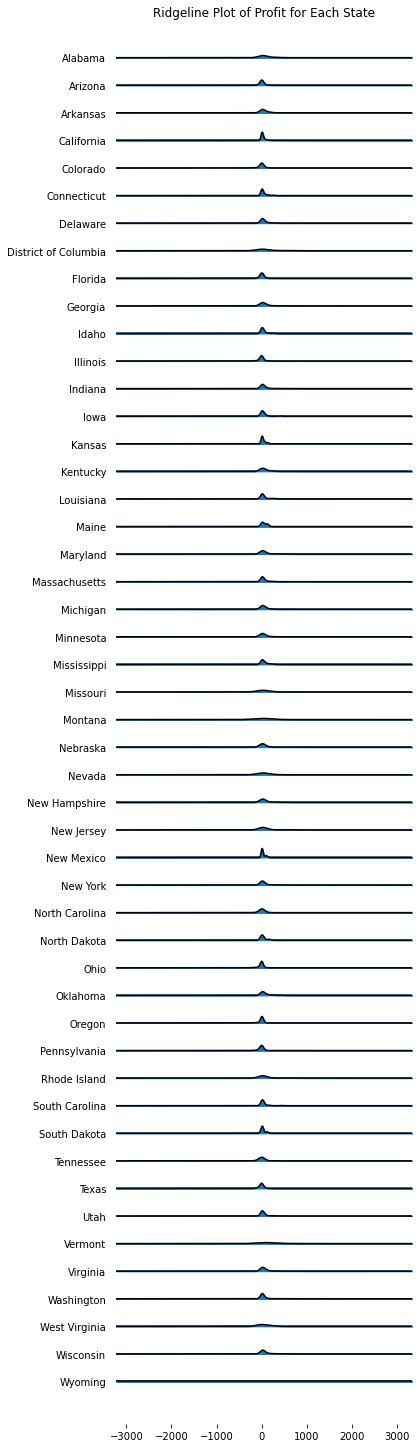

In [76]:
# plotting distribution of profit for each state
%matplotlib inline
plt.figure()

joyplot(
#     hist = True,
    data = df2.query("(Profit > -2500) & (Profit < 2500)")[['State', 'Profit']],
    by = 'State',
#     bins = 5,
    figsize = (6, 20)
)

plt.title('Ridgeline Plot of Profit for Each State')

plt.show()

### Going to use another dataset 
The amount of variability in Profit and sales makes it difficult to glean any meaningful insights. 

In [79]:
df3 = pd.read_excel(filePath, sheet_name = 'ridgelineData')
df3

,Order Date - Full,Order Date - mm/yyyy,State,Sub-Category,Sales,Cost,Profit,Discount,Quantity
0,2021-11-08,2021-11-08,Kentucky,Bookcases,261.9600,220.0464,41.9136,0.00,2
1,2021-11-08,2021-11-08,Kentucky,Chairs,731.9400,512.3580,219.5820,0.00,3
2,2021-06-12,2021-06-12,California,Labels,14.6200,7.7486,6.8714,0.00,2
3,2020-10-11,2020-10-11,Florida,Tables,957.5775,1340.6085,-383.0310,0.45,5
4,2020-10-11,2020-10-11,Florida,Storage,22.3680,19.8516,2.5164,0.20,2
...,...,...,...,...,...,...,...,...,...
9989,2019-01-21,2019-01-21,Florida,Furnishings,25.2480,21.1452,4.1028,0.20,3
9990,2022-02-26,2022-02-26,California,Furnishings,91.9600,76.3268,15.6332,0.00,2
9991,2022-02-26,2022-02-26,California,Phones,258.5760,239.1828,19.3932,0.20,2
9992,2022-02-26,2022-02-26,California,Paper,29.6000,16.2800,13.3200,0.00,4


<Figure size 432x288 with 0 Axes>

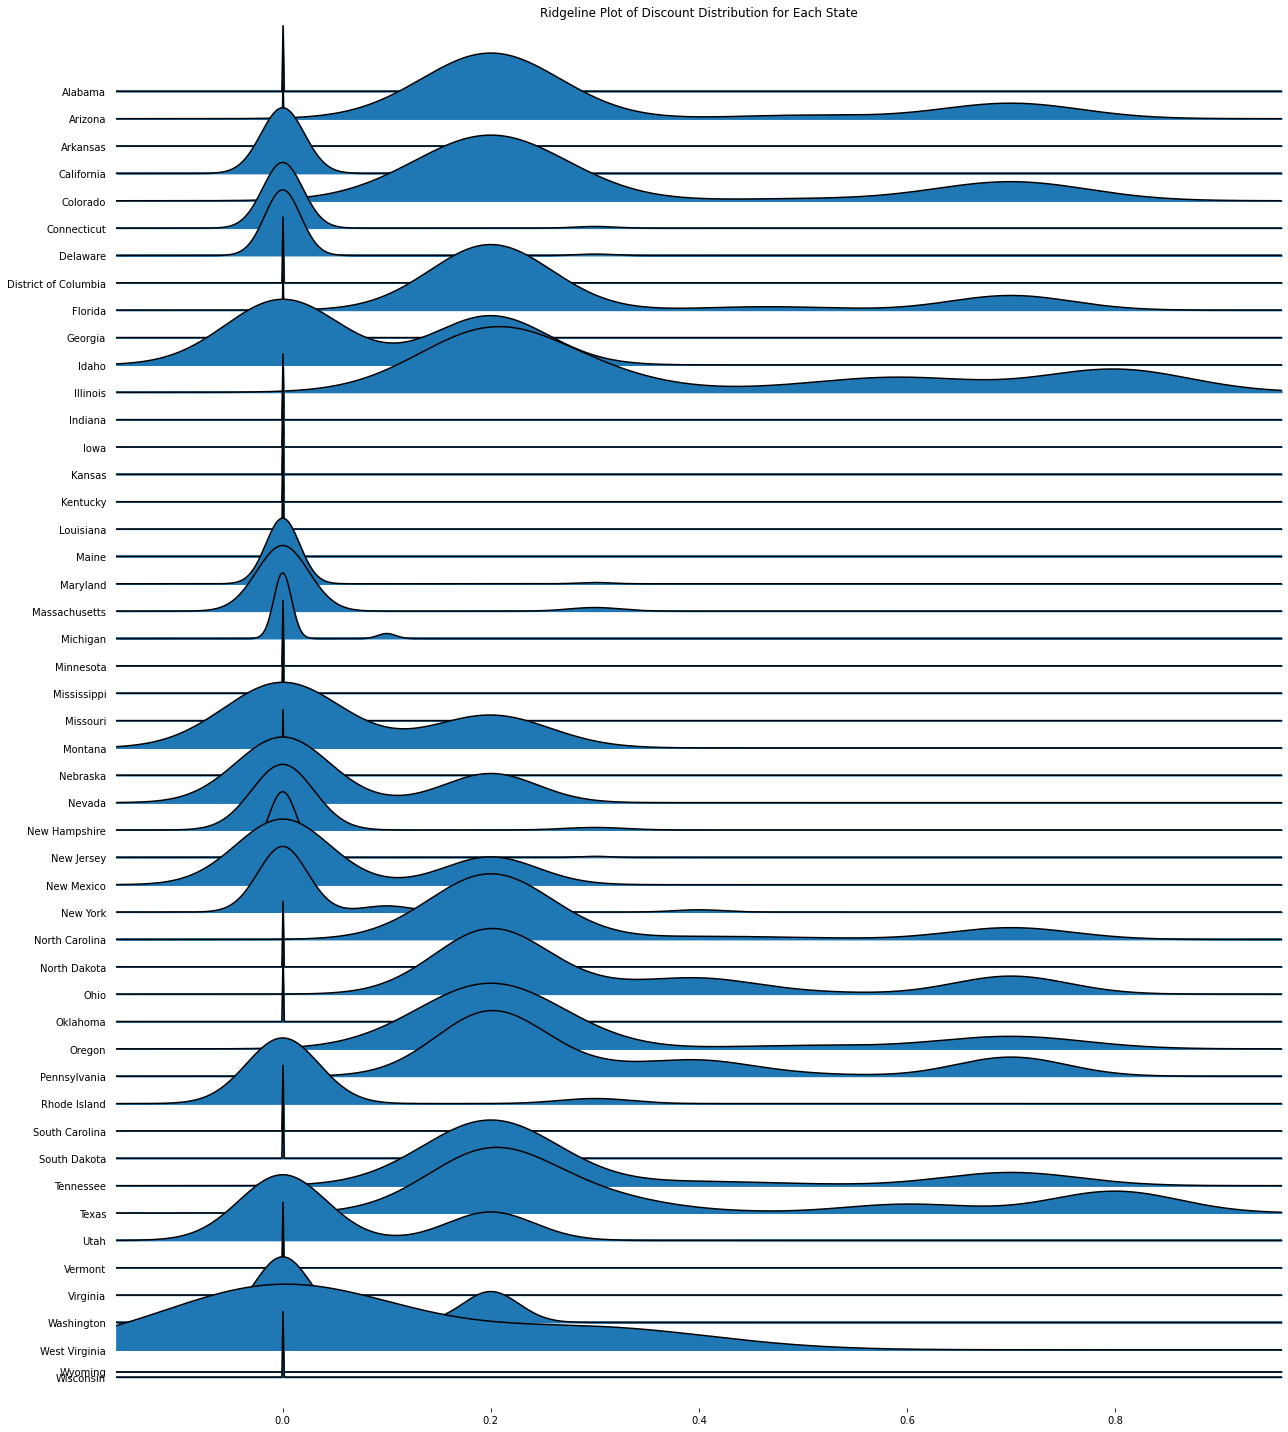

In [97]:
import warnings
warnings.filterwarnings('ignore')

# plotting distribution of profit for each state
%matplotlib inline
plt.figure()

joyplot(
#     hist = True,
    data = df3[['State', 'Discount']],
    by = 'State',
#     bins = 5,
    ylim = 'own',
#     colormap = plt.cm.autumn_r,
#     overlap = 3,
    figsize = (18, 20),
    title = 'Ridgeline Plot of Discount Distribution for Each State'
)

plt.show()